>#### Fri Jun 21, 2024
-------------------------------------------
> - Using the setup with the new power supply Keithley 2450.
> - Measuring the I-V Curve for the SiPM.
> - Reproducing the method to measure the Breakdown Voltage $V_{BD}$ from  [Hamamatsu](https://hub.hamamatsu.com/us/en/technical-notes/mppc-sipms/what-is-an-SiPM-and-how-does-it-work.html).
--------------------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
csv_file = 'FirstSiPM_ScopeData/defbuffer1_0622_051813.csv'
data = pd.read_csv(csv_file, skiprows=8,usecols=['Reading', 'Value'])  
# Read the CSV file into a pandas DataFrame

data.head()

,Reading,Value
0,-0.000015,-60.000656
1,-0.000015,-59.901299
2,-0.000014,-59.798332
3,-0.000014,-59.698608
4,-0.000013,-59.598675


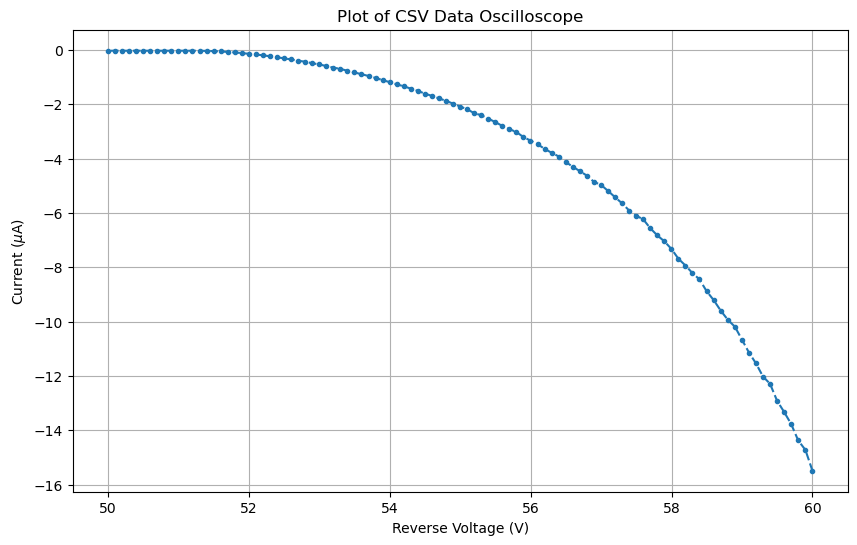

In [48]:
# Extract the columns
voltage = data.iloc[:, 1]  # the first column is seconds
current = data.iloc[:, 0]*10**6  # the second column is Volts

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(-voltage, current, marker='.', linestyle='--')
plt.ylabel(r'Current ($\mu$A)')
plt.xlabel('Reverse Voltage (V)')
plt.title('Plot of CSV Data Oscilloscope')
plt.grid()

plt.show()

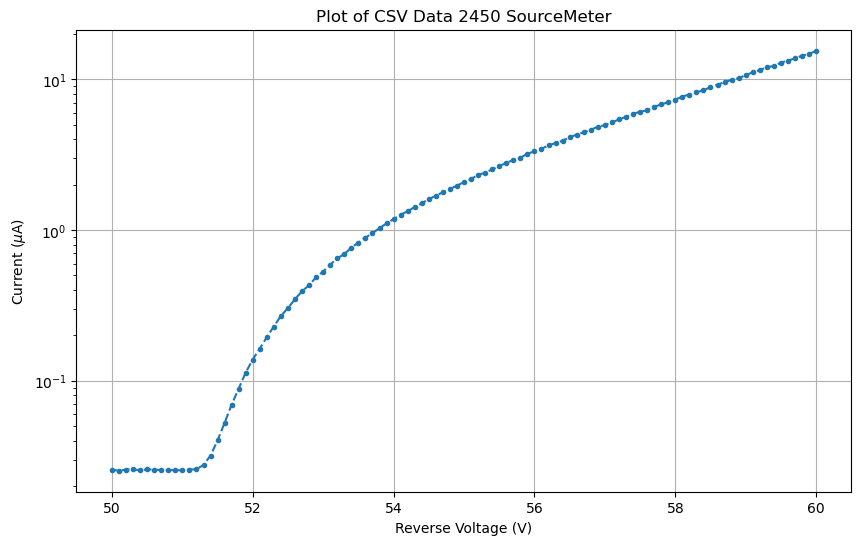

In [46]:
import numpy as np
#np.diff(voltage
#np.log(np.array(-current))
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(-voltage, -current, marker='.', linestyle='--')
plt.yscale('log')
plt.ylabel(r'Current ($\mu$A)')
plt.xlabel('Reverse Voltage (V)')
plt.title('Plot of CSV Data 2450 SourceMeter')
plt.grid()

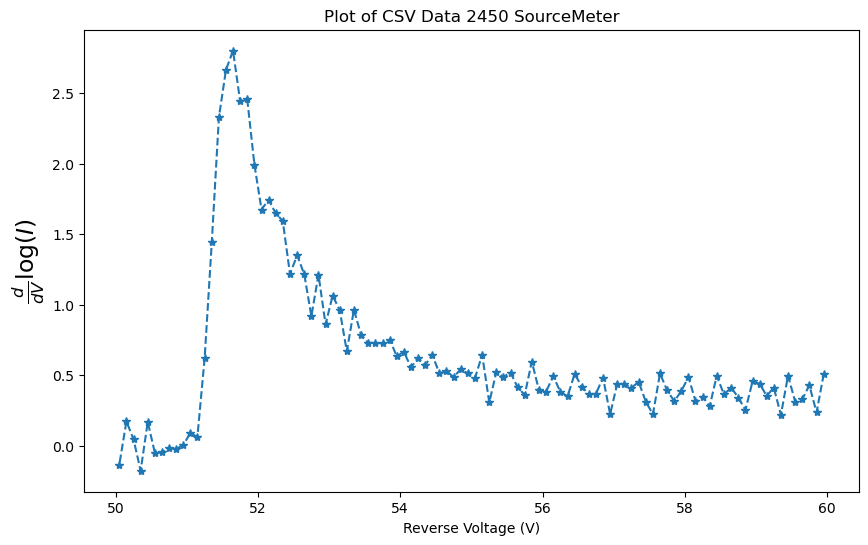

In [60]:
voltage = np.array(voltage)
der = np.diff(np.log(np.array(-current))) / np.diff(voltage)
x2 = (voltage[:-1] + voltage[1:]) / 2

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(-x2, -der, marker='*', linestyle='--', label = 'SiPM')
plt.ylabel(r'$\frac{d}{dV}\log(I)$', fontsize =17, rotation = 'vertical')
plt.xlabel('Reverse Voltage (V)')
plt.title('Plot of CSV Data 2450 SourceMeter')

plt.show()

-------------------------------------------
> - It was possible to observe the peak inside the band width for the expected Breakdown voltage according to the SiPm spreadsheet.
> - Breakdown voltage : $V_{BD} = 53 \pm 5$ V. (Cool!)
--------------------------------------------------------